In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [17]:
train_data = pd.read_csv('Dataset/train.csv')
test_data = pd.read_csv('Dataset/test.csv')

In [18]:
# --- Cek informasi struktur dataset ---
print("=== TRAIN DATA INFO ===")
print(train_data.info())
print("\n=== TEST DATA INFO ===")
print(test_data.info())

=== TRAIN DATA INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
None

=== TEST DATA INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB
None


In [19]:
# --- c. Tampilkan 5 data teratas dan terbawah ---
print("\n=== 5 Data Teratas (Train) ===")
display(train_data.head())
print("\n=== 5 Data Terbawah (Train) ===")
display(train_data.tail())

print("\n=== 5 Data Teratas (Test) ===")
display(test_data.head())
print("\n=== 5 Data Terbawah (Test) ===")
display(test_data.tail())


=== 5 Data Teratas (Train) ===


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation



=== 5 Data Terbawah (Train) ===


,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow



=== 5 Data Teratas (Test) ===


,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."



=== 5 Data Terbawah (Test) ===


,id,tweet
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."
17196,49159,"my song ""so glad"" free download! #shoegaze ..."


In [20]:
# --- d. Ringkasan statistik dataset (hanya kolom numerik) ---
print("\n=== Statistik Kolom Numerik (Train) ===")
display(train_data.describe())


=== Statistik Kolom Numerik (Train) ===


,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [21]:
# --- Statistik tambahan untuk kolom label ---
print("\nDistribusi Label:")
print(train_data['label'].value_counts())


Distribusi Label:
label
0    29720
1     2242
Name: count, dtype: int64


# 2. Preprocessing Data

In [36]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [23]:
# a. Inisialisasi stopwords dan lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
# b. Fungsi pembersihan teks
def clean_text(text):

    text = str(text).lower()                        
    text = re.sub(r'http\S+|www\S+|https\S+', '', text) 
    text = re.sub(r'@\w+', '', text)                
    text = re.sub(r'#\w+', '', text)                
    text = re.sub(r'[^a-z\s]', ' ', text)           
    text = re.sub(r'\s+', ' ', text).strip()        
    return text

In [ ]:
# c. Fungsi preprocessing lengkap (clean + tokenisasi + stopword + lemmatization)
def preprocess_text(text):
    text = clean_text(text)
    tokens = word_tokenize(text)                                 
    tokens = [t for t in tokens if t not in stop_words]          
    tokens = [lemmatizer.lemmatize(t) for t in tokens]           
    return " ".join(tokens)

In [28]:
# d. Terapkan preprocessing ke dataset
train_data['clean_tweet'] = train_data['tweet'].apply(preprocess_text)
test_data['clean_tweet']  = test_data['tweet'].apply(preprocess_text)

In [ ]:
# e. Tampilkan contoh hasil sebelum dan sesudah preprocessing
print("\nContoh hasil preprocessing:")
for i in range(3):
    print(f"\nTweet asli   : {train_data['tweet'][i]}")
    print(f"Setelah clean: {train_data['clean_tweet'][i]}")


Contoh hasil preprocessing:

Tweet asli   :  @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
Setelah clean: father dysfunctional selfish drag kid dysfunction

Tweet asli   : @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
Setelah clean: thanks credit use cause offer wheelchair van pdx

Tweet asli   :   bihday your majesty
Setelah clean: bihday majesty

✅ Tahap 2 (Preprocessing Data) selesai.


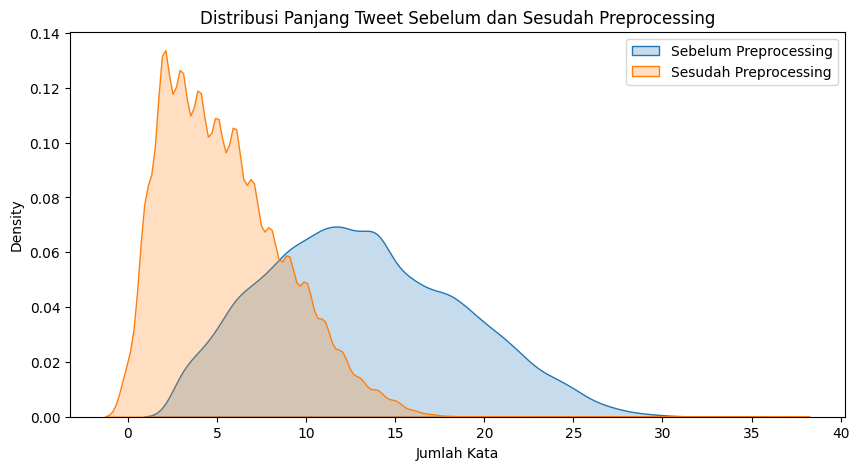

In [35]:
train_data['len_before'] = train_data['tweet'].apply(lambda x: len(str(x).split()))
train_data['len_after']  = train_data['clean_tweet'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10,5))
sns.kdeplot(train_data['len_before'], label='Sebelum Preprocessing', fill=True)
sns.kdeplot(train_data['len_after'], label='Sesudah Preprocessing', fill=True)
plt.title('Distribusi Panjang Tweet Sebelum dan Sesudah Preprocessing')
plt.xlabel('Jumlah Kata')
plt.legend()
plt.show()

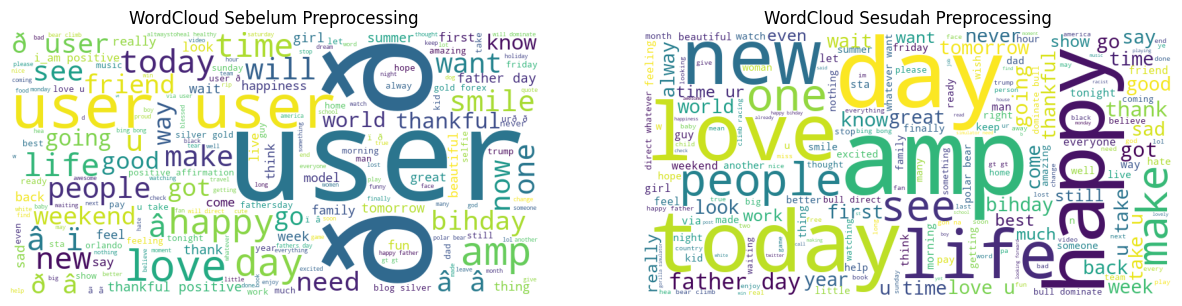

In [37]:
text_before = " ".join(train_data['tweet'].astype(str).values)
text_after  = " ".join(train_data['clean_tweet'].astype(str).values)

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(text_before))
plt.axis('off')
plt.title('WordCloud Sebelum Preprocessing')

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(text_after))
plt.axis('off')
plt.title('WordCloud Sesudah Preprocessing')
plt.show()

# 3. Inisiasi input dan target class

In [52]:
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
X = train_data["tweet"]
y = train_data["label"]

print("\nContoh data training:")
display(pd.DataFrame({'tweet': X.head(5), 'label': y.head(5)}))


Contoh data training:


,tweet,label
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nJumlah data training:", len(X_train))
print("Jumlah data validation:", len(X_val))

# Gabungkan kembali ke DataFrame untuk keperluan visualisasi
train_split_df = pd.DataFrame({"tweet": X_train, "label": y_train})
val_split_df = pd.DataFrame({"tweet": X_val, "label": y_val})


Jumlah data training: 25569
Jumlah data validation: 6393


C:\Users\Faliq\AppData\Local\Temp\ipykernel_17376\584113743.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, ax=axes[0], palette="Blues")
C:\Users\Faliq\AppData\Local\Temp\ipykernel_17376\584113743.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axes[1], palette="Oranges")
C:\Users\Faliq\AppData\Local\Temp\ipykernel_17376\584113743.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_val, ax=axes[2], palette="Greens")


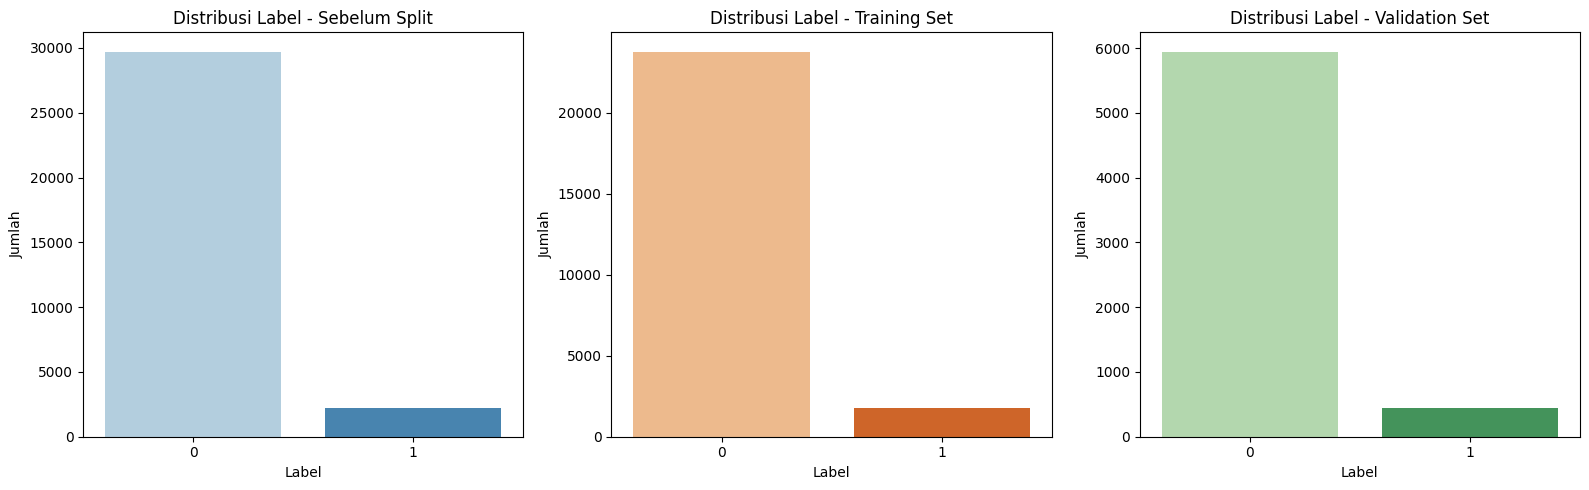

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Sebelum split
sns.countplot(x=y, ax=axes[0], palette="Blues")
axes[0].set_title("Distribusi Label - Sebelum Split")
axes[0].set_xlabel("Label")
axes[0].set_ylabel("Jumlah")

# Setelah split (train)
sns.countplot(x=y_train, ax=axes[1], palette="Oranges")
axes[1].set_title("Distribusi Label - Training Set")
axes[1].set_xlabel("Label")
axes[1].set_ylabel("Jumlah")

# Setelah split (validation)
sns.countplot(x=y_val, ax=axes[2], palette="Greens")
axes[2].set_title("Distribusi Label - Validation Set")
axes[2].set_xlabel("Label")
axes[2].set_ylabel("Jumlah")

plt.tight_layout()
plt.show()

In [ ]:
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

print("\nBobot kelas (class weights):")
for label, weight in class_weights.items():
    print(f"Label {label}: {weight:.4f}")


Bobot kelas (class weights):
Label 0: 0.5377
Label 1: 7.1263


In [ ]:
print("\nProporsi label di Training set:")
print(y_train.value_counts(normalize=True))
print("\nProporsi label di Validation set:")
y_val.value_counts(normalize=True)


Proporsi label di Training set:
label
0    0.929837
1    0.070163
Name: proportion, dtype: float64

Proporsi label di Validation set:


label
0    0.929923
1    0.070077
Name: proportion, dtype: float64

# 4. Bangun model Recurrent Neural Network (RNN)

In [57]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
max_words = 10000   # jumlah kata unik maksimum
max_len = 100       # panjang maksimum tiap tweet (dalam kata)

# Inisialisasi tokenizer
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Ubah teks menjadi urutan angka
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

# Padding agar panjang tweet seragam
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post', truncating='post')

print("Contoh tweet asli:\n", X_train.iloc[0])
print("\nSetelah tokenisasi (5 kata pertama):\n", X_train_seq[0][:5])
print("\nSetelah padding (panjang):", len(X_train_pad[0]))


Contoh tweet asli:
 did my first order at @user ð ... something black &amp; sexy from @user 's collection!   #cantwait  

Setelah tokenisasi (5 kata pertama):
 [257, 13, 106, 614, 29]

Setelah padding (panjang): 100


In [72]:
# Inisialisasi tokenizer (gunakan 10.000 kata paling sering muncul)
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Konversi teks ke urutan angka
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

# Tentukan panjang maksimum tweet
max_len = max(len(x) for x in X_train_seq)

# Padding agar panjang semua tweet sama
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post', truncating='post')

# Tentukan ukuran vocab
vocab_size = len(tokenizer.word_index) + 1

print(f"✅ Jumlah kata unik dalam dataset: {vocab_size}")
print(f"✅ Panjang maksimum sequence tweet: {max_len}")

✅ Jumlah kata unik dalam dataset: 39645
✅ Panjang maksimum sequence tweet: 42


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),                # Dropout pertama
    Dense(64, activation='relu'),
    Dropout(0.5),                # Dropout kedua
    Dense(1, activation='sigmoid')
])

# Kompilasi model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=10,
    batch_size=64,
    class_weight=class_weights,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 35s 82ms/step - accuracy: 0.7895 - loss: 0.4313 - val_accuracy: 0.8695 - val_loss: 0.2799
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 32s 80ms/step - accuracy: 0.9298 - loss: 0.1864 - val_accuracy: 0.8944 - val_loss: 0.2683
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 31s 78ms/step - accuracy: 0.9615 - loss: 0.1058 - val_accuracy: 0.9495 - val_loss: 0.1436
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 32s 79ms/step - accuracy: 0.9716 - loss: 0.0717 - val_accuracy: 0.9362 - val_loss: 0.1937
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.9805 - loss: 0.0499 - val_accuracy: 0.9453 - val_loss: 0.1932


# 5. Evaluasi model

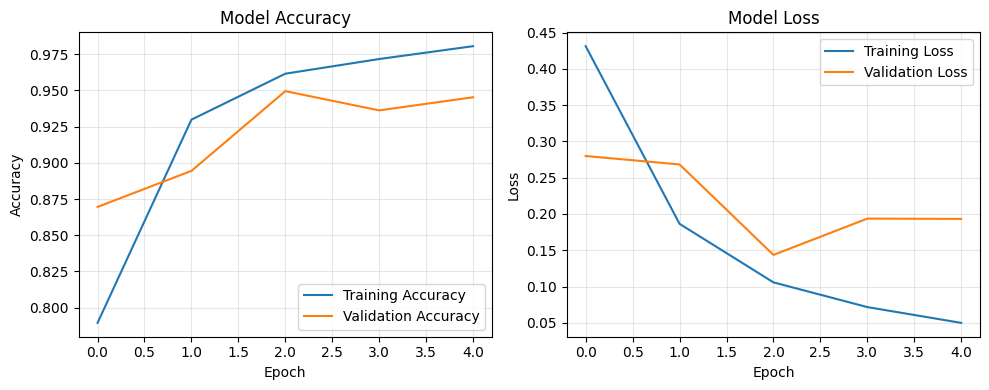

In [ ]:
plt.figure(figsize=(10, 4))

# --- Plot Akurasi ---
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(alpha=0.3)

# --- Plot Loss ---
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
# Gunakan data yang sudah di-padding
X_val_final = np.array(X_val_pad).astype("float32")
y_val_final = np.array(y_val).astype("float32")

# Evaluasi
val_loss, val_acc = model.evaluate(X_val_final, y_val_final, verbose=0)
print(f"\n✅ Validation Accuracy: {val_acc*100:.2f}%")
print(f"📉 Validation Loss: {val_loss:.4f}\n")


✅ Validation Accuracy: 94.95%
📉 Validation Loss: 0.1436



200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
📊 Classification Report:
              precision    recall  f1-score   support

     Negatif       0.98      0.97      0.97      5945
     Positif       0.62      0.73      0.67       448

    accuracy                           0.95      6393
   macro avg       0.80      0.85      0.82      6393
weighted avg       0.95      0.95      0.95      6393



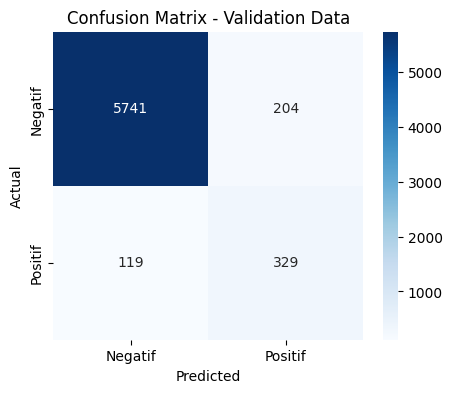

In [ ]:
y_pred_prob = model.predict(X_val_final)
y_pred = (y_pred_prob > 0.5).astype("int32")

print("📊 Classification Report:")
print(classification_report(y_val_final, y_pred, target_names=["Negatif", "Positif"]))

# Confusion Matrix
cm = confusion_matrix(y_val_final, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Negatif", "Positif"],
            yticklabels=["Negatif", "Positif"])
plt.title("Confusion Matrix - Validation Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
test_df = pd.read_csv("Dataset/test.csv")

# --- 2. Tokenisasi dan Padding data uji ---
X_test_seq = tokenizer.texts_to_sequences(test_df['tweet'])  # ganti 'tweet' sesuai nama kolom
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# --- 3. Prediksi ---
y_test_pred_prob = model.predict(X_test_pad)
y_test_pred = (y_test_pred_prob > 0.5).astype("int32")

# --- 4. Jika ada label sebenarnya ---
if 'label' in test_df.columns:
    print("\n📊 Evaluation on Test Set:")
    print(classification_report(test_df['label'], y_test_pred, target_names=["Negatif", "Positif"]))
else:
    print("\n📈 Hasil Prediksi Data Baru:")
    for i in range(5):
        print(f"Tweet: {test_df['tweet'].iloc[i][:60]}...")
        print(f"Prediksi Sentimen: {'Positif' if y_test_pred[i][0]==1 else 'Negatif'}\n")

      id                                              tweet
0  31963  #studiolife #aislife #requires #passion #dedic...
1  31964   @user #white #supremacists want everyone to s...
2  31965  safe ways to heal your #acne!!    #altwaystohe...
3  31966  is the hp and the cursed child book up for res...
4  31967    3rd #bihday to my amazing, hilarious #nephew...
538/538 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step

📈 Hasil Prediksi Data Baru:
Tweet: #studiolife #aislife #requires #passion #dedication #willpow...
Prediksi Sentimen: Negatif

Tweet:  @user #white #supremacists want everyone to see the new â...
Prediksi Sentimen: Positif

Tweet: safe ways to heal your #acne!!    #altwaystoheal #healthy   ...
Prediksi Sentimen: Negatif

Tweet: is the hp and the cursed child book up for reservations alre...
Prediksi Sentimen: Positif

Tweet:   3rd #bihday to my amazing, hilarious #nephew eli ahmir! un...
Prediksi Sentimen: Negatif

